In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 100   # mol
R = 8.314 # (N*m)/(mol*K)
T = 300   # K    
# P       # N/m^2
# V       # m^3

In [3]:
def vol_pres (X):
    return n*R*T/X

vol_pres(1000)


def get_data_PV(nb_train_data, nb_test_data, mean_epsilon0, std_epsilon0, mean_epsilon1, std_epsilon1, random_seed):
    
    np.random.seed(random_seed)

    epsilon0 = np.random.normal(mean_epsilon0, std_epsilon0, (nb_train_data))
    testEpsilon0 = np.random.normal(mean_epsilon0, std_epsilon0, (nb_test_data)) 
    
    epsilon1 = np.random.normal(mean_epsilon1, std_epsilon1, (nb_train_data))
    testEpsilon1 = np.random.normal(mean_epsilon1, std_epsilon1, (nb_test_data))

    V = np.random.uniform(0,10,(nb_train_data))
    testV = np.random.normal(0, 10, (nb_test_data))

    Vtilde = V+epsilon0
    testVtilde = testV+testEpsilon0

    P = vol_pres(V)
    testP = vol_pres(testV)

    Ptilde = P+epsilon1
    testPtilde = testP+testEpsilon1
    
    return {"P":P, "V":V, "testP":testP, "testV":testV, "Ptilde":Ptilde, "Vtilde":Vtilde, "testPtilde":testPtilde, "testVtilde":testVtilde} 

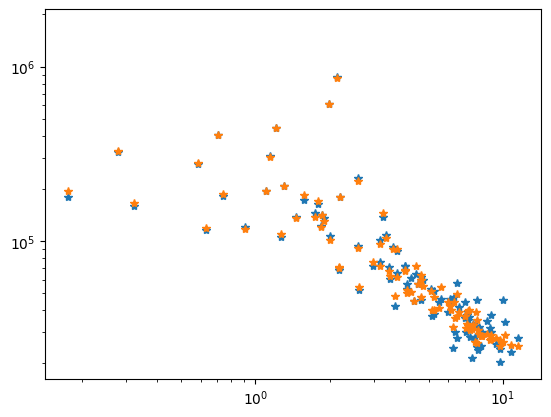

In [4]:
sol = get_data_PV(100, 100, 0, 1, 0, 5000,42)

plt.plot(sol["Vtilde"], sol["Ptilde"], "*")
plt.yscale("log")
plt.xscale("log")
plt.plot(sol["Vtilde"], sol["P"], "*")
plt.yscale("log")
plt.xscale("log")

Epoch 0, Loss: 0.17178519872815948
Epoch 100, Loss: 0.17073629705807686
Epoch 200, Loss: 0.17009841989329508
Epoch 300, Loss: 0.1695489221708663
Epoch 400, Loss: 0.1690618044283818
Epoch 500, Loss: 0.1685204540892259
Epoch 600, Loss: 0.16785938357656666
Epoch 700, Loss: 0.16703502244225035
Epoch 800, Loss: 0.16599205081207968
Epoch 900, Loss: 0.16465019726836283
Epoch 1000, Loss: 0.1628974965333678
Epoch 1100, Loss: 0.16056598060578192
Epoch 1200, Loss: 0.1574027071583258
Epoch 1300, Loss: 0.15301745675609746
Epoch 1400, Loss: 0.1467477725911287
Epoch 1500, Loss: 0.13767280073337942
Epoch 1600, Loss: 0.12499419041148933
Epoch 1700, Loss: 0.10813846008902393
Epoch 1800, Loss: 0.08807495736735203
Epoch 1900, Loss: 0.06867415253247437
Epoch 2000, Loss: 0.054387014390662874
Epoch 2100, Loss: 0.046065385675896214
Epoch 2200, Loss: 0.04168478555063237
Epoch 2300, Loss: 0.0392742117635487
Epoch 2400, Loss: 0.03785378760938261
Epoch 2500, Loss: 0.03705957779007816
Epoch 2600, Loss: 0.036672885

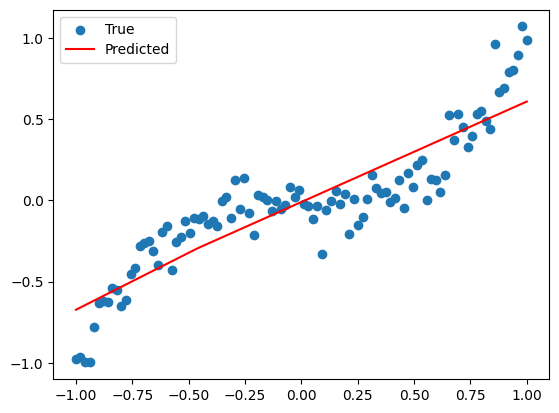

In [46]:
#Classical gradient descent

import numpy as np

# Activation function (ReLU) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Mean Squared Error and its derivative
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / len(y_true)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, nb_hidden):
        self.nb_hidden = nb_hidden
        
        # Initialize weights and biases for input to first hidden layer
        self.weights = [np.random.randn(input_dim, hidden_dim) * 0.1]
        self.biases = [np.zeros((1, hidden_dim))]
        
        # Initialize weights and biases for hidden layers
        for _ in range(nb_hidden - 1):
            self.weights.append(np.random.randn(hidden_dim, hidden_dim) * 0.1)
            self.biases.append(np.zeros((1, hidden_dim)))
        
        # Initialize weights and biases for last hidden layer to output
        self.weights.append(np.random.randn(hidden_dim, output_dim) * 0.1)
        self.biases.append(np.zeros((1, output_dim)))
    
    def forward(self, X):
        self.activations = [X]
        self.z_values = []
        
        # Forward pass through all layers
        for i in range(len(self.weights)):
            Z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(Z)
            if i == len(self.weights) - 1:  # No activation in the output layer
                self.activations.append(Z)
            else:
                self.activations.append(relu(Z))
        
        return self.activations[-1]
    
    def backward(self, X, y, y_pred, lr):
        # Compute gradient for the output layer
        dL_dZ = mse_derivative(y, y_pred)
        
        # Backpropagation through layers
        for i in reversed(range(len(self.weights))):
            dL_dW = np.dot(self.activations[i].T, dL_dZ)
            dL_db = np.sum(dL_dZ, axis=0, keepdims=True)
            
            if i > 0:
                dL_dA_prev = np.dot(dL_dZ, self.weights[i].T)
                dL_dZ = dL_dA_prev * relu_derivative(self.z_values[i - 1])
            
            # Update weights and biases
            self.weights[i] -= lr * dL_dW
            self.biases[i] -= lr * dL_db
    
    def train(self, X, y, epochs, lr):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = mse(y, y_pred)
            self.backward(X, y, y_pred, lr)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
    
    def predict(self, X):
        return self.forward(X)

# Example usage
if __name__ == "__main__":
    # Generate some training data
    X = np.linspace(-1, 1, 100).reshape(-1, 1)
    y = X**3 + np.random.normal(0, 0.1, X.shape)  # A simple cubic function with noise
    
    # Initialize and train the network
    nn = NeuralNetwork(input_dim=1, hidden_dim=10, output_dim=1, nb_hidden=3)
    nn.train(X, y, epochs=10000, lr=0.01)
    
    # Predict
    y_pred = nn.predict(X)
    
    # Plot the results (requires matplotlib)
    try:
        import matplotlib.pyplot as plt
        plt.scatter(X, y, label="True")
        plt.plot(X, y_pred, color="red", label="Predicted")
        plt.legend()
        plt.show()
    except ImportError:
        print("Matplotlib is not installed. Please install it to visualize the results.")


Epoch 0, Loss: 0.16096719429189374
Epoch 100, Loss: 0.07777961341716672
Epoch 200, Loss: 0.034199873306155676
Epoch 300, Loss: 0.02079428895995755
Epoch 400, Loss: 0.014193935914002
Epoch 500, Loss: 0.011166731479288787
Epoch 600, Loss: 0.010115671104096897
Epoch 700, Loss: 0.009849625876091873
Epoch 800, Loss: 0.009654404779441152
Epoch 900, Loss: 0.009603340257337868
Epoch 1000, Loss: 0.009585992908303335
Epoch 1100, Loss: 0.009578371058110819
Epoch 1200, Loss: 0.009550290002336287
Epoch 1300, Loss: 0.009539230487997553
Epoch 1400, Loss: 0.009531518451865045
Epoch 1500, Loss: 0.009512122161122204
Epoch 1600, Loss: 0.009492713702380973
Epoch 1700, Loss: 0.009459782723803762
Epoch 1800, Loss: 0.009450694898589658
Epoch 1900, Loss: 0.009443704410614696
Epoch 2000, Loss: 0.009438221412885028
Epoch 2100, Loss: 0.009434176911467225
Epoch 2200, Loss: 0.009430796766009737
Epoch 2300, Loss: 0.00942768113266256
Epoch 2400, Loss: 0.009424678971888676
Epoch 2500, Loss: 0.009421851654333555
Epoch

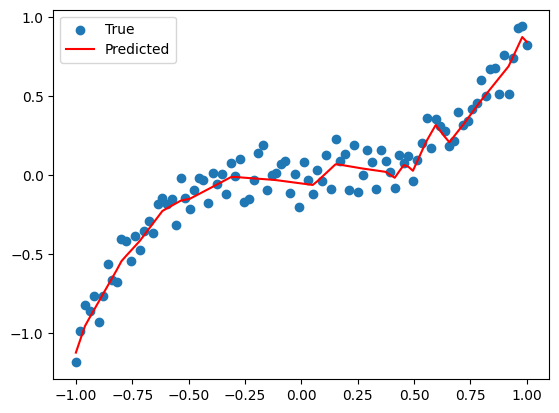

In [60]:
# Nesterov


import numpy as np

# Activation function (ReLU) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Mean Squared Error and its derivative
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / len(y_true)

# Neural Network with Nesterov Accelerated Gradient Descent
class NeuralNetworkNAG:
    def __init__(self, input_dim, hidden_dim, output_dim, nb_hidden, lr=0.01, momentum=0.9):
        self.nb_hidden = nb_hidden
        self.lr = lr
        self.momentum = momentum
        
        # Initialize weights and biases
        self.weights = [np.random.randn(input_dim, hidden_dim) * 0.1]
        self.biases = [np.zeros((1, hidden_dim))]
        
        for _ in range(nb_hidden - 1):
            self.weights.append(np.random.randn(hidden_dim, hidden_dim) * 0.1)
            self.biases.append(np.zeros((1, hidden_dim)))
        
        self.weights.append(np.random.randn(hidden_dim, output_dim) * 0.1)
        self.biases.append(np.zeros((1, output_dim)))
        
        # Initialize velocity terms for weights and biases
        self.v_weights = [np.zeros_like(w) for w in self.weights]
        self.v_biases = [np.zeros_like(b) for b in self.biases]
    
    def forward(self, X):
        self.activations = [X]
        self.z_values = []
        
        for i in range(len(self.weights)):
            Z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(Z)
            if i == len(self.weights) - 1:
                self.activations.append(Z)  # No activation for the output layer
            else:
                self.activations.append(relu(Z))
        
        return self.activations[-1]
    
    def backward(self, X, y, y_pred):
        dL_dZ = mse_derivative(y, y_pred)
        gradients_weights = []
        gradients_biases = []
        
        for i in reversed(range(len(self.weights))):
            dL_dW = np.dot(self.activations[i].T, dL_dZ)
            dL_db = np.sum(dL_dZ, axis=0, keepdims=True)
            gradients_weights.insert(0, dL_dW)
            gradients_biases.insert(0, dL_db)
            
            if i > 0:
                dL_dA_prev = np.dot(dL_dZ, self.weights[i].T)
                dL_dZ = dL_dA_prev * relu_derivative(self.z_values[i - 1])
        
        return gradients_weights, gradients_biases
    
    def update_parameters(self, gradients_weights, gradients_biases):
        for i in range(len(self.weights)):
            # Look ahead with momentum
            look_ahead_weights = self.weights[i] - self.momentum * self.v_weights[i]
            look_ahead_biases = self.biases[i] - self.momentum * self.v_biases[i]
            
            # Compute gradients at look-ahead positions
            self.v_weights[i] = self.momentum * self.v_weights[i] + self.lr * gradients_weights[i]
            self.v_biases[i] = self.momentum * self.v_biases[i] + self.lr * gradients_biases[i]
            
            # Update weights and biases
            self.weights[i] -= self.v_weights[i]
            self.biases[i] -= self.v_biases[i]
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = mse(y, y_pred)
            gradients_weights, gradients_biases = self.backward(X, y, y_pred)
            self.update_parameters(gradients_weights, gradients_biases)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
    
    def predict(self, X):
        return self.forward(X)

# Example usage
if __name__ == "__main__":
    # Generate some training data
    X = np.linspace(-1, 1, 100).reshape(-1, 1)
    y = X**3 + np.random.normal(0, 0.1, X.shape)  # A simple cubic function with noise
    
    # Initialize and train the network
    nn = NeuralNetworkNAG(input_dim=1, hidden_dim=40, output_dim=1, nb_hidden=5, lr=0.01, momentum=0.9)
    nn.train(X, y, epochs=100000)
    
    # Predict
    y_pred = nn.predict(X)
    
    # Plot the results (requires matplotlib)
    try:
        import matplotlib.pyplot as plt
        plt.scatter(X, y, label="True")
        plt.plot(X, y_pred, color="red", label="Predicted")
        plt.legend()
        plt.show()
    except ImportError:
        print("Matplotlib is not installed. Please install it to visualize the results.")


Epoch 0, Loss: 0.16555439716164608
Epoch 100, Loss: 0.013418212589683266
Epoch 200, Loss: 0.006739938357076976
Epoch 300, Loss: 0.006623353539511605
Epoch 400, Loss: 0.006575002401715325
Epoch 500, Loss: 0.006515692901517326
Epoch 600, Loss: 0.006489502245451597
Epoch 700, Loss: 0.0064625187128296456
Epoch 800, Loss: 0.0064054493053847614
Epoch 900, Loss: 0.006433055303792805
Epoch 1000, Loss: 0.006362716083718977
Epoch 1100, Loss: 0.0062799766675117165
Epoch 1200, Loss: 0.006234020076761988
Epoch 1300, Loss: 0.006209630117763008
Epoch 1400, Loss: 0.006234364689709996
Epoch 1500, Loss: 0.0061513509467769146
Epoch 1600, Loss: 0.006103871000866623
Epoch 1700, Loss: 0.006090100721053096
Epoch 1800, Loss: 0.006053989308834479
Epoch 1900, Loss: 0.006004711920090504
Epoch 2000, Loss: 0.006069362320365014
Epoch 2100, Loss: 0.006134303857542482
Epoch 2200, Loss: 0.005994398535616573
Epoch 2300, Loss: 0.005831129175563522
Epoch 2400, Loss: 0.005822753850363398
Epoch 2500, Loss: 0.00584892595821

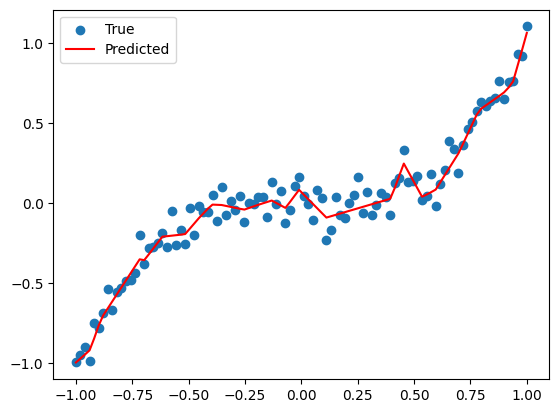

In [65]:
#Adam 



import numpy as np

# Activation function (ReLU) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Mean Squared Error and its derivative
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / len(y_true)

# Neural Network with Adam optimizer
class NeuralNetworkAdam:
    def __init__(self, input_dim, hidden_dim, output_dim, nb_hidden, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.nb_hidden = nb_hidden
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        
        # Initialize weights and biases
        self.weights = [np.random.randn(input_dim, hidden_dim) * 0.1]
        self.biases = [np.zeros((1, hidden_dim))]
        
        for _ in range(nb_hidden - 1):
            self.weights.append(np.random.randn(hidden_dim, hidden_dim) * 0.1)
            self.biases.append(np.zeros((1, hidden_dim)))
        
        self.weights.append(np.random.randn(hidden_dim, output_dim) * 0.1)
        self.biases.append(np.zeros((1, output_dim)))
        
        # Initialize Adam parameters
        self.m_weights = [np.zeros_like(w) for w in self.weights]
        self.v_weights = [np.zeros_like(w) for w in self.weights]
        self.m_biases = [np.zeros_like(b) for b in self.biases]
        self.v_biases = [np.zeros_like(b) for b in self.biases]
        self.t = 0  # Time step for Adam updates
    
    def forward(self, X):
        self.activations = [X]
        self.z_values = []
        
        for i in range(len(self.weights)):
            Z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(Z)
            if i == len(self.weights) - 1:
                self.activations.append(Z)  # No activation for the output layer
            else:
                self.activations.append(relu(Z))
        
        return self.activations[-1]
    
    def backward(self, X, y, y_pred):
        dL_dZ = mse_derivative(y, y_pred)
        gradients_weights = []
        gradients_biases = []
        
        for i in reversed(range(len(self.weights))):
            dL_dW = np.dot(self.activations[i].T, dL_dZ)
            dL_db = np.sum(dL_dZ, axis=0, keepdims=True)
            gradients_weights.insert(0, dL_dW)
            gradients_biases.insert(0, dL_db)
            
            if i > 0:
                dL_dA_prev = np.dot(dL_dZ, self.weights[i].T)
                dL_dZ = dL_dA_prev * relu_derivative(self.z_values[i - 1])
        
        return gradients_weights, gradients_biases
    
    def update_parameters(self, gradients_weights, gradients_biases):
        self.t += 1
        for i in range(len(self.weights)):
            # Update weights
            self.m_weights[i] = self.beta1 * self.m_weights[i] + (1 - self.beta1) * gradients_weights[i]
            self.v_weights[i] = self.beta2 * self.v_weights[i] + (1 - self.beta2) * (gradients_weights[i] ** 2)
            m_hat = self.m_weights[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v_weights[i] / (1 - self.beta2 ** self.t)
            self.weights[i] -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
            
            # Update biases
            self.m_biases[i] = self.beta1 * self.m_biases[i] + (1 - self.beta1) * gradients_biases[i]
            self.v_biases[i] = self.beta2 * self.v_biases[i] + (1 - self.beta2) * (gradients_biases[i] ** 2)
            m_hat_b = self.m_biases[i] / (1 - self.beta1 ** self.t)
            v_hat_b = self.v_biases[i] / (1 - self.beta2 ** self.t)
            self.biases[i] -= self.lr * m_hat_b / (np.sqrt(v_hat_b) + self.epsilon)
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = mse(y, y_pred)
            gradients_weights, gradients_biases = self.backward(X, y, y_pred)
            self.update_parameters(gradients_weights, gradients_biases)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
    
    def predict(self, X):
        return self.forward(X)

# Example usage
if __name__ == "__main__":
    # Generate some training data
    X = np.linspace(-1, 1, 100).reshape(-1, 1)
    y = X**3 + np.random.normal(0, 0.1, X.shape)  # A simple cubic function with noise
    
    # Initialize and train the network
    nn = NeuralNetworkAdam(input_dim=1, hidden_dim=40, output_dim=1, nb_hidden=5)
    nn.train(X, y, epochs=10000)
    
    # Predict
    y_pred = nn.predict(X)
    
    # Plot the results (requires matplotlib)
    try:
        import matplotlib.pyplot as plt
        plt.scatter(X, y, label="True")
        plt.plot(X, y_pred, color="red", label="Predicted")
        plt.legend()
        plt.show()
    except ImportError:
        print("Matplotlib is not installed. Please install it to visualize the results.")
